# Making Corner plot for WASP-62

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import juliet as jl

In [2]:
# Reading Dataset from the folder
dataset = jl.load(input_folder='multisector_in_transit_ExpMatern')

In [3]:
# Creating result object
res1 = dataset.fit(sampler='dynamic_dynesty')

Detected dynamic_dynesty sampler output files --- extracting from multisector_in_transit_ExpMatern/_dynesty_DNS_posteriors.pkl


In [4]:
# Extracting posterior sample
post1 = res1.posteriors['posterior_samples']

# Extracting planetary parameters
per, aste, t0, q1, q2 = post1['P_p1'], post1['a_p1'], post1['t0_p1'],\
     post1['q1_TESS1_TESS2_TESS3_TESS4_TESS6_TESS7_TESS8_TESS9_TESS10_TESS11_TESS12_TESS13_TESS27_TESS28_TESS29_TESS30_TESS31_TESS32_TESS33_TESS34'],\
     post1['q2_TESS1_TESS2_TESS3_TESS4_TESS6_TESS7_TESS8_TESS9_TESS10_TESS11_TESS12_TESS13_TESS27_TESS28_TESS29_TESS30_TESS31_TESS32_TESS33_TESS34']
u1, u2 = jl.utils.reverse_ld_coeffs('quadratic',q1,q2)
b,p = post1['b_p1'], post1['p_p1']
t01 = t0 - 2457000 - 2252.585

# Creating a 3D array for corner
b1 = np.vstack((aste,t01))
c1 = np.vstack((b1,u1))
d1 = np.vstack((c1,u2))
e1 = np.vstack((d1,b))
f1 = np.vstack((e1,p))
data = np.transpose(f1)

# Median values
value = np.median(data, axis=0)
ndim = 6

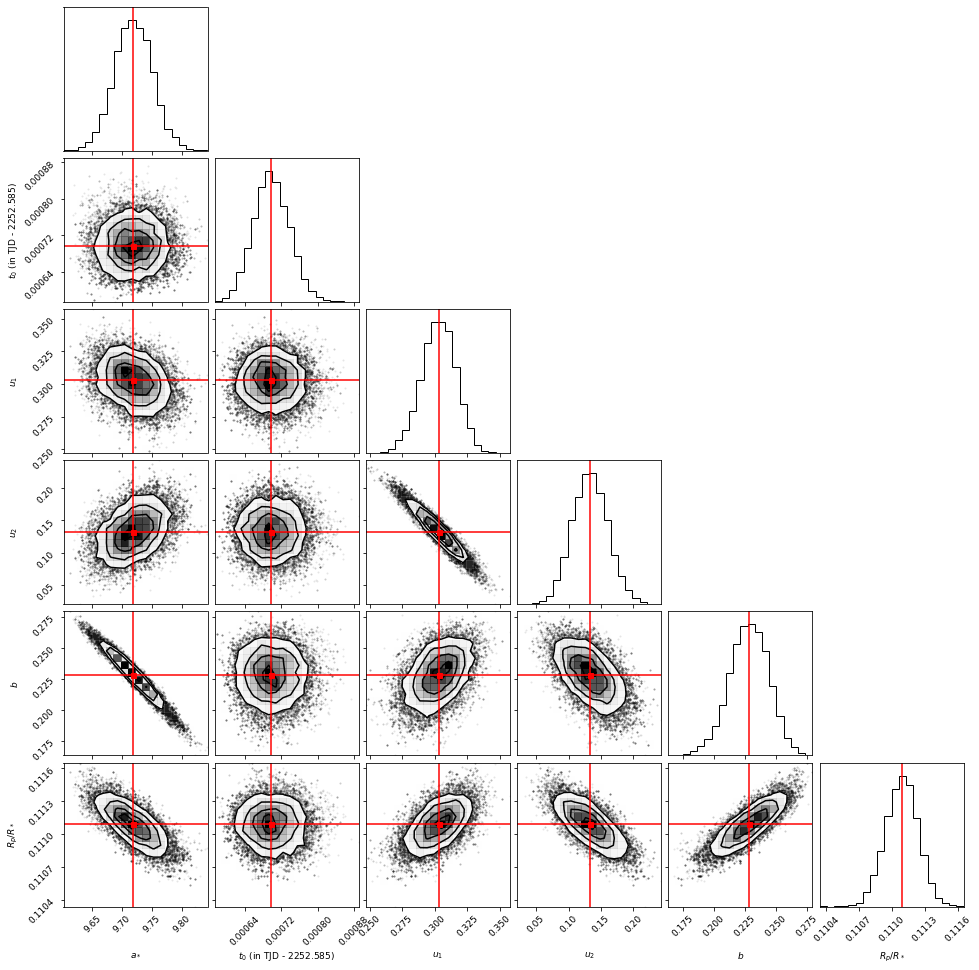

In [5]:
fig = corner.corner(data, labels=[r"$a_*$",r"$t_0 $ (in TJD - 2252.585)", r"$u_1$",r"$u_2$",r"$b$",r"$R_p/R_*$"])

axes = np.array(fig.axes).reshape((ndim, ndim))

for i in range(ndim):
    ax = axes[i,i]
    ax.axvline(value[i], color = 'r')

for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(value[xi], color = 'r')
        ax.axhline(value[yi], color = 'r')
        ax.plot(value[xi], value[yi], 'sr')

fig.savefig("3.pdf")